# 서울에서 지역 별로 어떤 크기의 아파트가 많이 거래될까?

- 지금까지 익힌 방법으로 관심있는 데이터를 분석해봅니다.
- 데이터 출처 : [KOSIS 년도별 세부항목 아파트매매거래현황](https://kosis.kr/statHtml/statHtml.do?orgId=408&tblId=DT_408_2006_S0063&conn_path=I2)

## 목차
1.  라이브러리 임포트, 한글폰트 사용 세팅
2. 데이터 준비하기
3. EDA
4. 데이터 전처리
5. 데이터 분석을 위한 Tidy dataset 만들기
6. 시각화 및 검증하기
7. 번외 분석
8. 회고

## 1.라이브러리 임포트, 한글폰트 사용 세팅

In [ ]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 한글폰트 사용을 위해 설치
!pip install koreanize-matplotlib

import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 22.3 MB/s eta 0:00:00


---

## 2.데이터 준비하기
- 활용 데이터 : 2019년~2023년 아파트 매매 거래현황
- [kosis 데이터 출처](https://kosis.kr/statHtml/statHtml.do?orgId=408&tblId=DT_408_2006_S0063&conn_path=I2)

In [ ]:
# 현재 디렉토리 확인

import os
os.getcwd()

'/content'

In [ ]:
# 작업 디렉토리 변경
os.chdir('/content/drive/MyDrive/AI/naver_coaching_study_2024/week04')

In [ ]:
os.getcwd()

'/content/drive/MyDrive/AI/naver_coaching_study_2024/week04'

In [ ]:
# 데이터 목록 확인하기
from glob import glob

glob('data/*')

['data/online_oversea_202210.csv',
 'data/online_oversea_20142019.csv',
 'data/online_oversea_2022.csv',
 'data/import_price_index_20192024.csv',
 'data/apt_transactions_20192023.csv']

In [ ]:
# data load
df05 = pd.read_csv('data/apt_transactions_20192023.csv', encoding='cp949')
df05

,행정구역별(1),행정구역별(2),유형별(1),유형별(2),2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
0,행정구역별(1),행정구역별(2),유형별(1),유형별(2),호수 (호수),면적 (천㎡),호수 (호수),면적 (천㎡),호수 (호수),면적 (천㎡),호수 (호수),면적 (천㎡),호수 (호수),면적 (천㎡)
1,서울특별시,종로구,매입자거주지,관할 시군구내,224,19,230,21,133,12,49,3,117,10
2,서울특별시,종로구,매입자거주지,관할 시도내,292,24,466,36,306,21,87,5,147,11
3,서울특별시,종로구,매입자거주지,관할 시도외 서울,0,0,0,0,0,0,0,0,0,0
4,서울특별시,종로구,매입자거주지,관할 시도외 기타,142,9,174,13,112,7,66,3,82,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,대구광역시,군위군,매입자연령대,40대,-,-,-,-,-,-,-,-,0,0
1447,대구광역시,군위군,매입자연령대,50대,-,-,-,-,-,-,-,-,0,0
1448,대구광역시,군위군,매입자연령대,60대,-,-,-,-,-,-,-,-,0,0
1449,대구광역시,군위군,매입자연령대,70대이상,-,-,-,-,-,-,-,-,3,0


## 3.EDA

In [ ]:
df05.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1451 entries, 0 to 1450
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   행정구역별(1)  1451 non-null   object
 1   행정구역별(2)  1451 non-null   object
 2   유형별(1)    1451 non-null   object
 3   유형별(2)    1451 non-null   object
 4   2019      1451 non-null   object
 5   2019.1    1451 non-null   object
 6   2020      1451 non-null   object
 7   2020.1    1451 non-null   object
 8   2021      1451 non-null   object
 9   2021.1    1451 non-null   object
 10  2022      1451 non-null   object
 11  2022.1    1451 non-null   object
 12  2023      1451 non-null   object
 13  2023.1    1451 non-null   object
dtypes: object(14)
memory usage: 158.8+ KB


> - 모든 데이터의 타입이 str이다.  
- 2019와 2019.1은 동일한 2019년도이며, 호수와 면적에 따른 구분이다.

### 각 컬럼의 unique 값 확인하기

In [ ]:
# unique 값 확인
df05["행정구역별(1)"].unique()

array(['행정구역별(1)', '서울특별시', '부산광역시', '대구광역시'], dtype=object)

In [ ]:
# unique 값 확인
df05["행정구역별(2)"].unique()

array(['행정구역별(2)', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구',
       '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', '서구',
       '동구', '영도구', '부산진구', '동래구', '남구', '북구', '해운대구', '사하구', '금정구',
       '연제구', '수영구', '사상구', '기장군', '수성구', '달서구', '달성군', '군위군'],
      dtype=object)

- 각 컬럼 별 unique 값을 한 번에 확인하기

In [ ]:
# 컬럼 확인
df05.columns

Index(['행정구역별(1)', '행정구역별(2)', '유형별(1)', '유형별(2)', '2019', '2019.1', '2020',
       '2020.1', '2021', '2021.1', '2022', '2022.1', '2023', '2023.1'],
      dtype='object')

In [ ]:
# 컬럼을 리스트에 담기
index_list = ['행정구역별(1)', '행정구역별(2)', '유형별(1)', '유형별(2)']

In [ ]:
# 컬럼 별 유니크 값 얻기
unique_value_list = map(lambda x : df05[x].unique(), index_list)

In [ ]:
# 유니크 값들을 list에 넣기
unique_values = list(unique_value_list)

In [ ]:
# 컬럼 별 유니크 값 확인
unique_values

[array(['행정구역별(1)', '서울특별시', '부산광역시', '대구광역시'], dtype=object),
 array(['행정구역별(2)', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
        '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구',
        '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', '서구',
        '동구', '영도구', '부산진구', '동래구', '남구', '북구', '해운대구', '사하구', '금정구',
        '연제구', '수영구', '사상구', '기장군', '수성구', '달서구', '달성군', '군위군'],
       dtype=object),
 array(['유형별(1)', '매입자거주지', '거래주체', '거래규모', '매입자연령대'], dtype=object),
 array(['유형별(2)', '관할 시군구내', '관할 시도내', '관할 시도외 서울', '관할 시도외 기타', '개인->개인',
        '개인->법인', '개인->기타', '법인->개인', '법인->법인', '법인->기타', '기타->개인',
        '기타->법인', '기타->기타', '20㎡이하', '21~40㎡', '41~60㎡', '61~85㎡',
        '86~100㎡', '101~135㎡', '136~165㎡', '166~198㎡', '198㎡초과', '20대이하',
        '30대', '40대', '50대', '60대', '70대이상', '기타'], dtype=object)]

In [ ]:
for column, values in zip(index_list, unique_values):
    print(f"'{column}'의 unique 값 : {values}")

'행정구역별(1)'의 unique 값 : ['행정구역별(1)' '서울특별시' '부산광역시' '대구광역시']
'행정구역별(2)'의 unique 값 : ['행정구역별(2)' '종로구' '중구' '용산구' '성동구' '광진구' '동대문구' '중랑구' '성북구' '강북구' '도봉구'
 '노원구' '은평구' '서대문구' '마포구' '양천구' '강서구' '구로구' '금천구' '영등포구' '동작구' '관악구' '서초구'
 '강남구' '송파구' '강동구' '서구' '동구' '영도구' '부산진구' '동래구' '남구' '북구' '해운대구' '사하구'
 '금정구' '연제구' '수영구' '사상구' '기장군' '수성구' '달서구' '달성군' '군위군']
'유형별(1)'의 unique 값 : ['유형별(1)' '매입자거주지' '거래주체' '거래규모' '매입자연령대']
'유형별(2)'의 unique 값 : ['유형별(2)' '관할 시군구내' '관할 시도내' '관할 시도외 서울' '관할 시도외 기타' '개인->개인' '개인->법인'
 '개인->기타' '법인->개인' '법인->법인' '법인->기타' '기타->개인' '기타->법인' '기타->기타' '20㎡이하'
 '21~40㎡' '41~60㎡' '61~85㎡' '86~100㎡' '101~135㎡' '136~165㎡' '166~198㎡'
 '198㎡초과' '20대이하' '30대' '40대' '50대' '60대' '70대이상' '기타']


### -> 컬럼 별 unique값과 데이터프레임을 확인한 결과
- 행정구역별(1) : 시 단위
- 행정구역별(2) : 구 단위
- 유형별(1) : 분류 기준
- 유형별(2) : 분류 기준의 세부항목   
이다.

## 4.데이터 전처리
### 🧐 검증 목표를 위한 EDA check list
- 서울시 데이터만 sorting : 행정구역벽(1) 인덱스에서 '서울특별시'
- 서울시의 거래규모만 sorting : 유형별(1) 인덱스에서 '거래규모'
- 서울시 거래규모의 호수만 sorting : 컬럼에서 .1이 붙지 않은 연도(호수)

In [ ]:
df05.sample(10)

,행정구역별(1),행정구역별(2),유형별(1),유형별(2),2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
855,부산광역시,부산진구,거래규모,20㎡이하,128,1,36,1,22,0,14,0,86,1
132,서울특별시,광진구,거래규모,41~60㎡,469,27,381,22,259,15,63,4,220,13
754,부산광역시,중구,매입자연령대,기타,4,0,13,1,32,2,20,1,3,0
1342,대구광역시,수성구,거래주체,법인->개인,31,3,88,8,59,5,23,2,27,3
1424,대구광역시,군위군,매입자거주지,관할 시도외 서울,-,-,-,-,-,-,-,-,0,0
814,부산광역시,영도구,매입자거주지,관할 시도내,185,11,538,34,427,26,157,10,115,7
1340,대구광역시,수성구,거래주체,개인->법인,197,17,77,7,188,10,27,1,7,1
386,서울특별시,마포구,거래주체,법인->법인,36,2,0,0,0,0,0,0,0,0
155,서울특별시,동대문구,거래주체,법인->기타,0,0,27,1,42,1,0,0,0,0
395,서울특별시,마포구,거래규모,86~100㎡,28,3,50,5,20,2,9,1,15,1


In [ ]:
# 데이터 복사본 만들기
df_total = df05.copy()
df_total

,행정구역별(1),행정구역별(2),유형별(1),유형별(2),2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
0,행정구역별(1),행정구역별(2),유형별(1),유형별(2),호수 (호수),면적 (천㎡),호수 (호수),면적 (천㎡),호수 (호수),면적 (천㎡),호수 (호수),면적 (천㎡),호수 (호수),면적 (천㎡)
1,서울특별시,종로구,매입자거주지,관할 시군구내,224,19,230,21,133,12,49,3,117,10
2,서울특별시,종로구,매입자거주지,관할 시도내,292,24,466,36,306,21,87,5,147,11
3,서울특별시,종로구,매입자거주지,관할 시도외 서울,0,0,0,0,0,0,0,0,0,0
4,서울특별시,종로구,매입자거주지,관할 시도외 기타,142,9,174,13,112,7,66,3,82,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,대구광역시,군위군,매입자연령대,40대,-,-,-,-,-,-,-,-,0,0
1447,대구광역시,군위군,매입자연령대,50대,-,-,-,-,-,-,-,-,0,0
1448,대구광역시,군위군,매입자연령대,60대,-,-,-,-,-,-,-,-,0,0
1449,대구광역시,군위군,매입자연령대,70대이상,-,-,-,-,-,-,-,-,3,0


### 🧐 연도별 호수 컬럼만 남기기
- 불필요한 첫번째 행 삭제하기
- 컬럼에서 .1이 붙지 않은 연도(호수)만 남기기

In [ ]:
# 첫번째 컬럼 삭제하기
df_total = df_total.drop([0], axis=0)
df_total

,행정구역별(1),행정구역별(2),유형별(1),유형별(2),2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
1,서울특별시,종로구,매입자거주지,관할 시군구내,224,19,230,21,133,12,49,3,117,10
2,서울특별시,종로구,매입자거주지,관할 시도내,292,24,466,36,306,21,87,5,147,11
3,서울특별시,종로구,매입자거주지,관할 시도외 서울,0,0,0,0,0,0,0,0,0,0
4,서울특별시,종로구,매입자거주지,관할 시도외 기타,142,9,174,13,112,7,66,3,82,5
5,서울특별시,종로구,거래주체,개인->개인,622,48,792,65,485,36,180,10,327,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,대구광역시,군위군,매입자연령대,40대,-,-,-,-,-,-,-,-,0,0
1447,대구광역시,군위군,매입자연령대,50대,-,-,-,-,-,-,-,-,0,0
1448,대구광역시,군위군,매입자연령대,60대,-,-,-,-,-,-,-,-,0,0
1449,대구광역시,군위군,매입자연령대,70대이상,-,-,-,-,-,-,-,-,3,0


In [ ]:
# 호수를 의미하는 2019, 2020, 2021, 2022, 2023 컬럼만 남기기
df_total = df_total.drop(columns=['2019.1', '2020.1', '2021.1', '2022.1', '2023.1'])

In [ ]:
df_total.head()

,행정구역별(1),행정구역별(2),유형별(1),유형별(2),2019,2020,2021,2022,2023
1,서울특별시,종로구,매입자거주지,관할 시군구내,224,230,133,49,117
2,서울특별시,종로구,매입자거주지,관할 시도내,292,466,306,87,147
3,서울특별시,종로구,매입자거주지,관할 시도외 서울,0,0,0,0,0
4,서울특별시,종로구,매입자거주지,관할 시도외 기타,142,174,112,66,82
5,서울특별시,종로구,거래주체,개인->개인,622,792,485,180,327


### 🧐 서울시의 거래규모만 sorting
- 행정구역벽(1) 인덱스에서 '서울특별시'
- 유형별(1) 인덱스에서 '거래규모'

In [ ]:
df_seoul = df_total[(df_total['행정구역별(1)'] == '서울특별시') & (df_total['유형별(1)'] == '거래규모')].copy()
df_seoul

,행정구역별(1),행정구역별(2),유형별(1),유형별(2),2019,2020,2021,2022,2023
14,서울특별시,종로구,거래규모,20㎡이하,77,71,77,65,47
15,서울특별시,종로구,거래규모,21~40㎡,23,41,71,23,22
16,서울특별시,종로구,거래규모,41~60㎡,175,191,124,52,83
17,서울특별시,종로구,거래규모,61~85㎡,225,338,163,37,111
18,서울특별시,종로구,거래규모,86~100㎡,22,40,13,2,11
...,...,...,...,...,...,...,...,...,...
714,서울특별시,강동구,거래규모,86~100㎡,120,87,26,9,22
715,서울특별시,강동구,거래규모,101~135㎡,433,470,149,29,133
716,서울특별시,강동구,거래규모,136~165㎡,28,44,8,1,11
717,서울특별시,강동구,거래규모,166~198㎡,4,9,11,3,2


- '행정구역별(1)'과 '유형별(1)'의 unique 값과 개수 확인하기

In [ ]:
df_seoul['행정구역별(1)'].value_counts()

,count
행정구역별(1),
서울특별시,225


In [ ]:
df_seoul['유형별(1)'].value_counts()

,count
유형별(1),
거래규모,225


## 5.데이터 분석을 위한 Tidy dataset 만들기

In [ ]:
# 불필요한 데이터 제외하기 : '행정구역별(1)', '유형별(1)'
df_tidy = df_seoul.drop(columns=['행정구역별(1)', '유형별(1)']).copy()
df_tidy

,행정구역별(2),유형별(2),2019,2020,2021,2022,2023
14,종로구,20㎡이하,77,71,77,65,47
15,종로구,21~40㎡,23,41,71,23,22
16,종로구,41~60㎡,175,191,124,52,83
17,종로구,61~85㎡,225,338,163,37,111
18,종로구,86~100㎡,22,40,13,2,11
...,...,...,...,...,...,...,...
714,강동구,86~100㎡,120,87,26,9,22
715,강동구,101~135㎡,433,470,149,29,133
716,강동구,136~165㎡,28,44,8,1,11
717,강동구,166~198㎡,4,9,11,3,2


In [ ]:
# tidy dataset 만들기

df_tidy = df_tidy.melt(id_vars=['행정구역별(2)', '유형별(2)'], var_name='연도', value_name='거래수')
df_tidy

,행정구역별(2),유형별(2),연도,거래수
0,종로구,20㎡이하,2019,77
1,종로구,21~40㎡,2019,23
2,종로구,41~60㎡,2019,175
3,종로구,61~85㎡,2019,225
4,종로구,86~100㎡,2019,22
...,...,...,...,...
1120,강동구,86~100㎡,2023,22
1121,강동구,101~135㎡,2023,133
1122,강동구,136~165㎡,2023,11
1123,강동구,166~198㎡,2023,2


In [ ]:
df_tidy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   행정구역별(2)  1125 non-null   object
 1   유형별(2)    1125 non-null   object
 2   연도        1125 non-null   object
 3   거래수       1125 non-null   object
dtypes: object(4)
memory usage: 35.3+ KB


In [ ]:
# 연도, 거래수의 데이터 타입 변경 : str -> int

df_tidy['연도'] = df_tidy['연도'].astype(int)
df_tidy['거래수'] = df_tidy['거래수'].astype(int)

df_tidy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   행정구역별(2)  1125 non-null   object
 1   유형별(2)    1125 non-null   object
 2   연도        1125 non-null   int64 
 3   거래수       1125 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 35.3+ KB


## 6.시각화 및 검증하기 : 서울 내 어떤 지역에서 거래가 많이 발생할까?

### 🧐 구 별, 면적 별 거래수 확인하기

In [ ]:
# 재구조화 : 구 별, 면적 별 거래수

df_area = df_tidy.groupby(['행정구역별(2)', '유형별(2)'])['거래수'].sum().unstack()
df_area

유형별(2),101~135㎡,136~165㎡,166~198㎡,198㎡초과,20㎡이하,21~40㎡,41~60㎡,61~85㎡,86~100㎡
행정구역별(2),,,,,,,,,
강남구,2549,1301,504,332,437,2021,3354,5478,913
강동구,1214,92,29,21,943,469,4010,6376,264
강북구,584,22,0,1,356,295,2102,2485,12
강서구,1389,161,81,0,435,1966,5092,6155,158
관악구,1031,71,15,0,560,490,2957,3162,81
광진구,382,339,86,34,229,78,1392,2300,56
구로구,1038,130,37,2,716,1165,5358,5700,67
금천구,529,11,0,1,332,516,1907,2204,131
노원구,1491,147,3,0,330,2669,12909,6689,323


<Axes: xlabel='유형별(2)', ylabel='행정구역별(2)'>

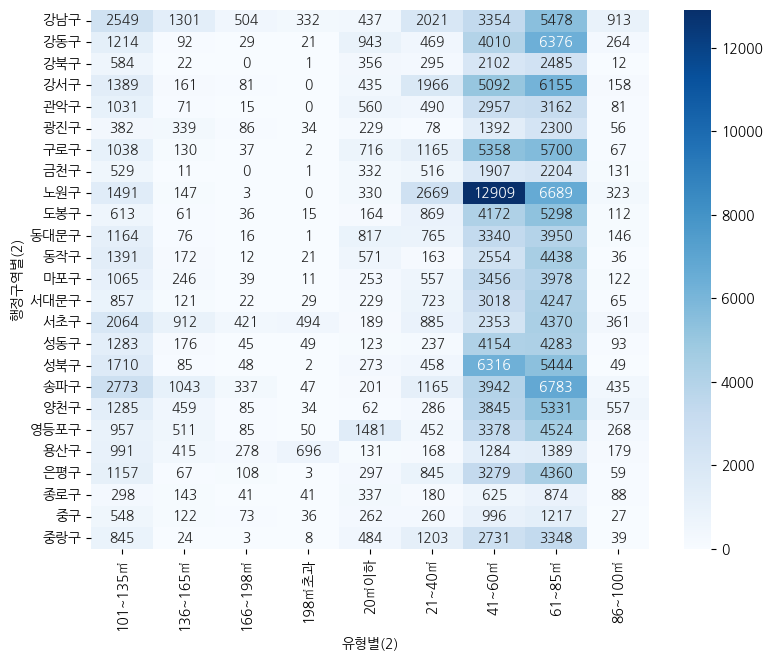

In [ ]:
# 시각화 : 구 별, 면적 별 거래수

plt.figure(figsize=(9, 7))
sns.heatmap(df_area, cmap='Blues', annot=True, fmt='.0f')

> ### ✅ 인사이트 도출
> - 41-60㎡, 61-85㎡ 거래량이 가장 많다.
> - 특히 노원구와 성북구의 거래량이 많다.

<ipython-input-120-2aee43fab308>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(df_tidy, x='행정구역별(2)', y='거래수', hue='유형별(2)', ci=None)


<Axes: xlabel='행정구역별(2)', ylabel='거래수'>

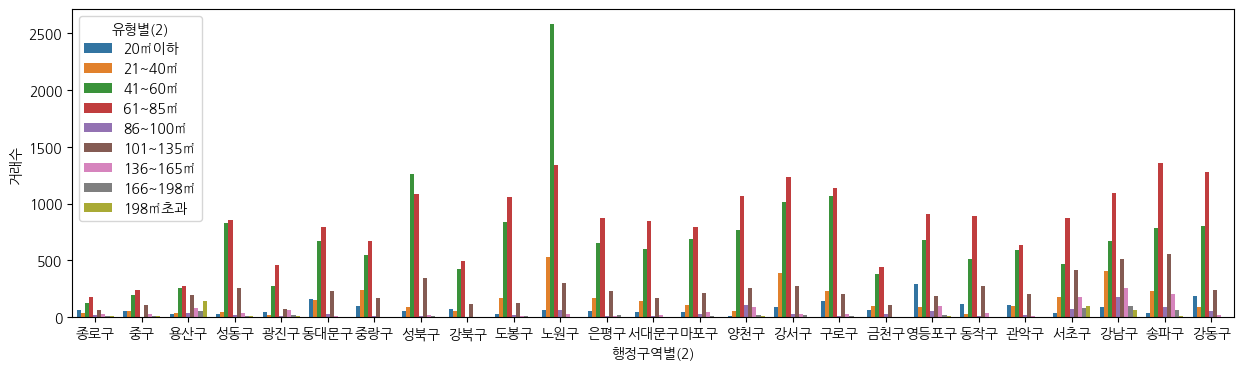

In [ ]:
# 구 별 거래수  확인하기

plt.figure(figsize=(15, 4))
sns.barplot(df_tidy, x='행정구역별(2)', y='거래수', hue='유형별(2)', ci=None)

## 7.번외

### 🧐 구 별로 어떤 면적의 아파트가 가장 많이 거래될까?

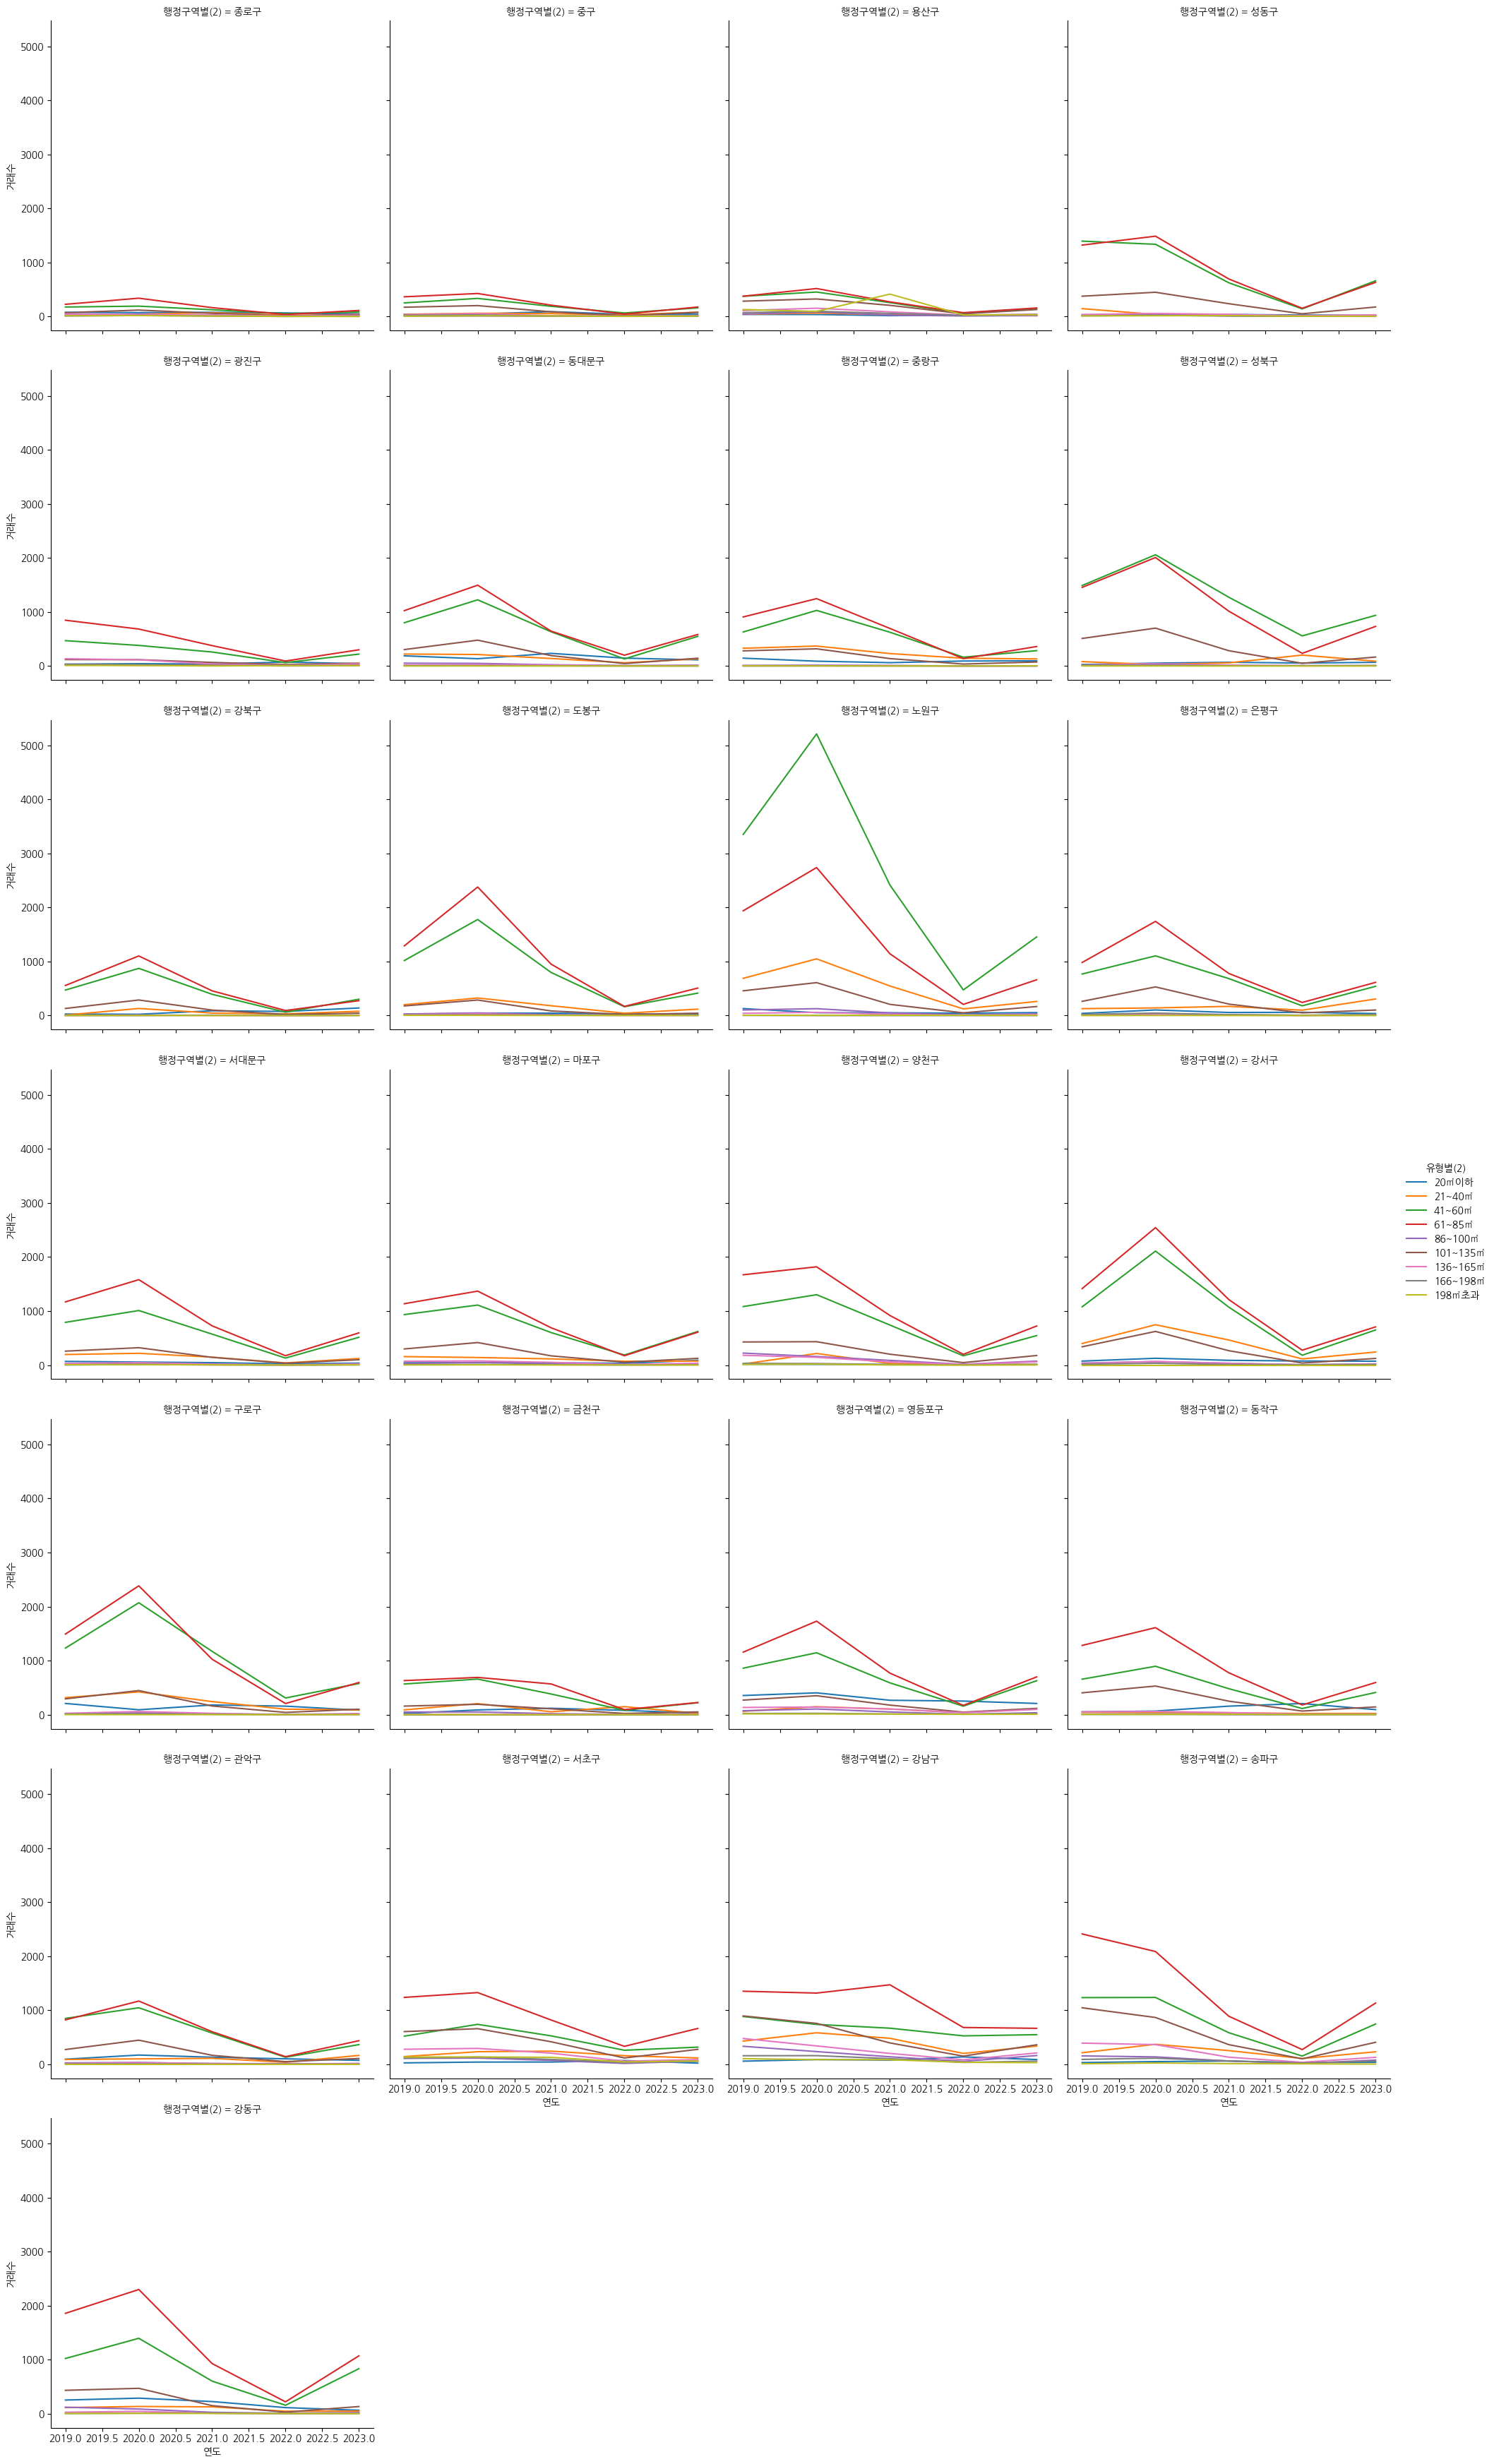

In [ ]:
# 행정구역별 어떤 면적의 아파트가 가장 많이 거래될까?

sns.relplot(data=df_tidy, x='연도', y='거래수', hue='유형별(2)', col='행정구역별(2)', col_wrap=4, kind='line')

> ### ✅ 인사이트 도출
> - 모든 구에서 41-60㎡, 61-85㎡ 의 거래량이 가장 많다.
> - 거래량 3-4순위는 대체적으로 21-40㎡와 101-135㎡이며, 순위는 구에 따라 다르게 나타난다.

### 🧐 구 별, 연도 별 거래수는?

In [ ]:
# 재구조화 : 구 별, 연도 별 거래수

df_year = df_tidy.groupby(['행정구역별(2)', '연도'])['거래수'].sum().unstack()
df_year

연도,2019,2020,2021,2022,2023
행정구역별(2),,,,,
강남구,4672,4286,3602,1886,2443
강동구,3837,4734,2082,580,2185
강북구,1201,2431,1094,282,849
강서구,3391,6314,3182,702,1848
관악구,2159,2987,1604,462,1155
광진구,1690,1402,821,291,692
구로구,3585,5516,2820,819,1473
금천구,1517,1881,1250,427,556
노원구,6715,9849,4434,916,2647


<Axes: xlabel='연도', ylabel='행정구역별(2)'>

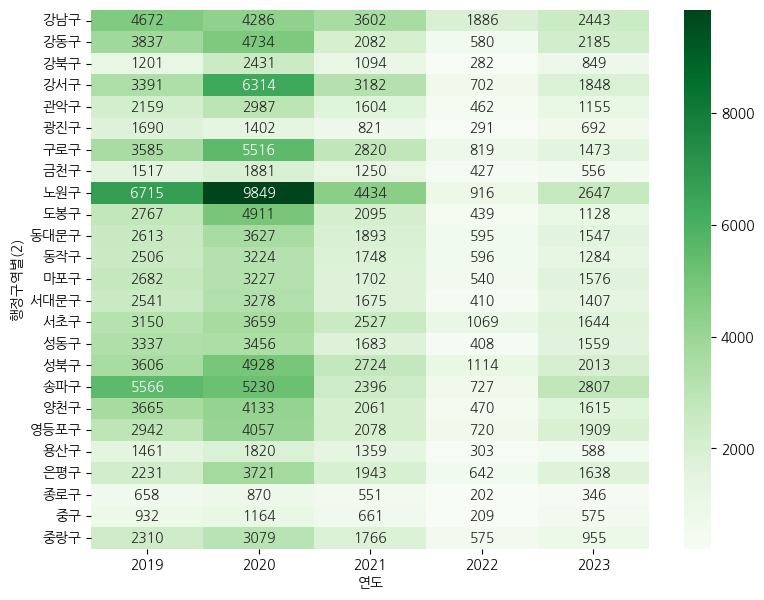

In [ ]:
# 구 별, 연도 별 거래수

plt.figure(figsize=(9, 7))
sns.heatmap(df_year, cmap='Greens', annot=True, fmt='.0f')

> ### ✅ 인사이트 도출
> - 2020년, 2019년 순서로 가장 활발히 거래가 이루어졌다.

## 👉 검증 결론
2019~2023년 서울 기준으로
- 거래가 가장 활발한 지역은 노원구이다.
- 거래가 가장 활발한 면적은 41-60㎡, 61-85㎡ 이다.
- 거래가 가장 활발했던 시기는 2020년이다.

---
## 8.회고
- KEEP
    - 막히는 부분은 검색하며 끝까지 해결하였다.
    - 내가 검증하고자 했던 목표를 적절히 검증하였다.
    - 검증하고자 했던 내용 외의 새로운 궁금증들도 다양하게 검증해보았다.
- PROBLEM
    - heatmap에서 아파트 면적을 오름차순으로 배열하는 방법도 궁금하다.
    - 필요한 기능을 위한 방법(함수 등)을 빠르게 캐치하고 적용하는 것이 어렵다.
- TRY
    - 궁금했던 기능, 필요한 기능을 많이 실습해보기
    - 같은 목적도 다양한 방법으로 풀어보기
    - 새로운 분석 및 검증 포인트를 잡아 EDA하고 분석 및 시각화 해보기
    - 목적에 따라 적절한 plot으로 시각화 되었는지 다양하게 적용해보기
        - 꺾은선 그래프에 점찍는 법? : replot도 가능할지? 어떤 plot들이 가능할까?
        - 연도를 내가 설정한대로 나오게 하는 방법은?
